# Taller 9 de agosto

**Andrés Ospina Patiño**

Realice un modelo con dummies estacionales y un SARIMA que tenga en cuenta posibles efectos día de la semana, y compare los resultados con los modelos estimados para el taller 3.

In [16]:
import datetime as dt
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.deterministic import Seasonality

In [17]:
### Load data
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2022, 7, 26)

df = web.DataReader('AMZN', 'yahoo', start, end)
df.to_csv('AMZN.csv')
amzn = df['Close']

In [18]:
train = amzn[:130]
test = amzn[130:]

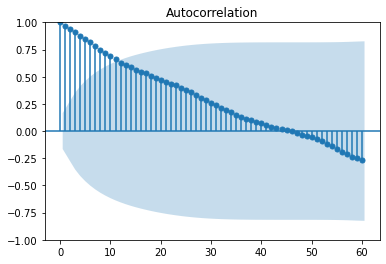

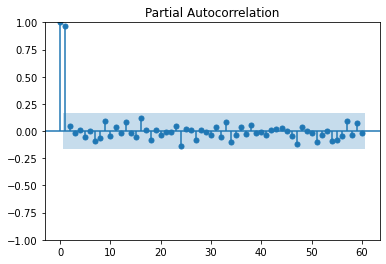

In [19]:
plot_acf(amzn, lags=60)
plot_pacf(amzn, lags=60)
plt.show()

In [20]:
mod_sarima_1000 = ARIMA(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 5))
sarima_1000 = mod_sarima_1000.fit()

/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
sarima_1000.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                           Close   No. Observations:                  130
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 5)   Log Likelihood                -382.048
Date:                         Sat, 13 Aug 2022   AIC                            772.095
Time:                                 15:52:53   BIC                            783.565
Sample:                                      0   HQIC                           776.756
                                         - 130                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.7116     15.453      9.041      0.000     109.425     169.998
ar.L1          0.9834      0.023     43.177      0.000       0.939       1.028
ar.S.L5       -0.0284      0.104     -0.273      0.785      -0.233       0.176
sigma2        20.3666      1.633     12.472      0.000      17.166      23.567
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                87.43
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.20
Prob(H) (two-sided):                  0.14   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

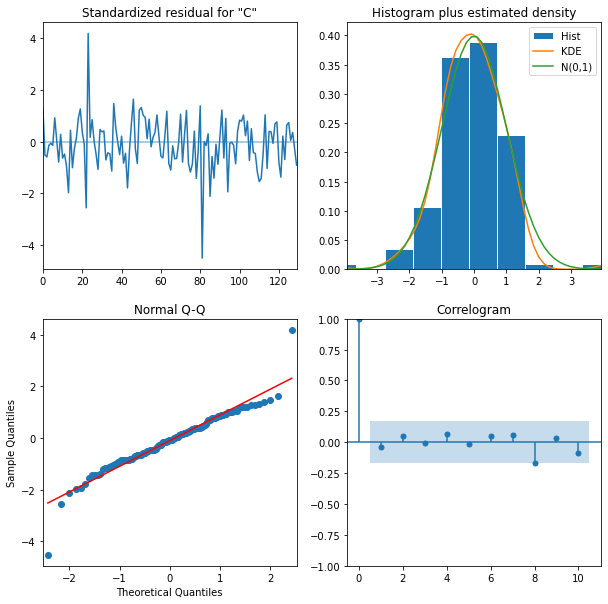

In [22]:
sarima_1000.plot_diagnostics(figsize=(10, 10))
plt.show()

In [23]:
seas_gen = Seasonality(5)
seas_gen = seas_gen.in_sample(train.index)

In [24]:
mod_sarima_1000_dummies = ARIMA(train, order=(1, 0, 0), exog=seas_gen)
sarima_1000_dummies = mod_sarima_1000.fit()

/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
sarima_1000_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                           Close   No. Observations:                  130
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 5)   Log Likelihood                -382.048
Date:                         Sat, 13 Aug 2022   AIC                            772.095
Time:                                 15:52:54   BIC                            783.565
Sample:                                      0   HQIC                           776.756
                                         - 130                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.7116     15.453      9.041      0.000     109.425     169.998
ar.L1          0.9834      0.023     43.177      0.000       0.939       1.028
ar.S.L5       -0.0284      0.104     -0.273      0.785      -0.233       0.176
sigma2        20.3666      1.633     12.472      0.000      17.166      23.567
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                87.43
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.20
Prob(H) (two-sided):                  0.14   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

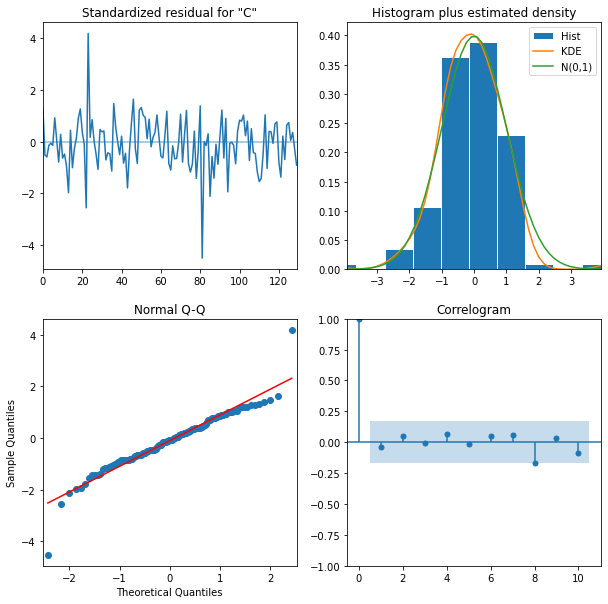

In [26]:
sarima_1000_dummies.plot_diagnostics(figsize=(10, 10))
plt.show()

/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


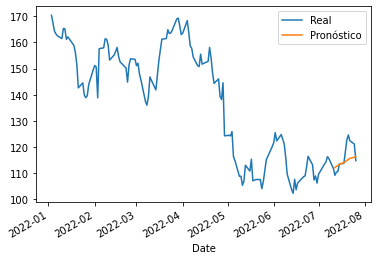

In [27]:
amzn.plot(label="Real")
sarima_1000.forecast(steps=11).set_axis(amzn.index[130:]).plot(label="Pronóstico")
plt.legend()

/Users/andresospinapatino/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


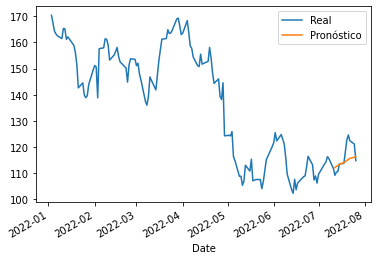

In [28]:
amzn.plot(label="Real")
sarima_1000_dummies.forecast(steps=11).set_axis(amzn.index[130:]).plot(label="Pronóstico")
plt.legend()

En general se observa que los modelos con dummies y el $AR(1)xSAR(5)$ son muy similares. Como se observa en las graficas de auto-correlación no hay un comportamineto estacional evidente, sin embargo se intenta ajustar el mejor modelo obtenido en el taller pasado AR(1) con una estacionalidad de 5, que representa una relación semanal. En cuanto a la validación se observa ruido blanco en ambos modelos y poco correlacionados. En cuanto a los coeficientes se observa que todos ellos son significativos exceptuando el de estacionalidad, lo que es congruente puesto que no la hay. Finalmente en cuanto a la predicción se puede observar en la gráfica que tiene un mejor ajuste para los modelos estacionales, sin embargo los coeficientes de información indica que el AR(1) es el mejor.